<a href="https://colab.research.google.com/github/JohnYCLam/MachineLearning/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exponential Smoothing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
levels = 2 + 0.05 * np.random.randn(120, )

In [ ]:
trends = np.linspace(0, 10, 120) + 0.1 * np.random.randn(120)

In [ ]:
seasonalities = np.sin(np.linspace(0, 119, 120) * (2 *np.pi / 12)) + 0.1 * np.random.randn(120,)

[]

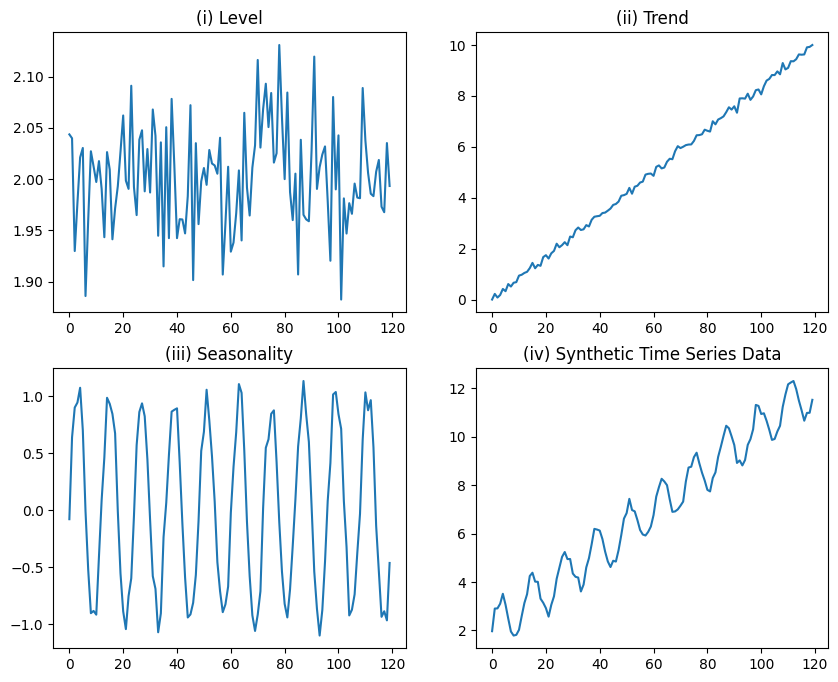

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (10, 8))
ax[0, 0].plot(level)
ax[0, 0].set_title('(i) Level')
ax[0, 1].plot(trend)
ax[0, 1].set_title('(ii) Trend')
ax[1, 0].plot(seasonality)
ax[1, 0].set_title('(iii) Seasonality')
ax[1, 1].plot(levels + trends + seasonalities)
ax[1, 1].set_title('(iv) Synthetic Time Series Data')
plt.plot()

In [ ]:
def SES(inputs, alpha = 0.2):
    predicts = [inputs[0], inputs[0]]
    for i in range(1, len(inputs) - 1):
        level = alpha * inputs[i] + (1 - alpha) * predicts[-1]
        predicts.append(level)

    return np.array(predicts)

In [ ]:
def train_step(alpha, lr_rate):
    epsilon = 1e-4
    loss_eps = np.mean((SES(level, alpha + epsilon) - level)**2)
    loss = np.mean((SES(level, alpha) - level)**2)
    delta = (loss_eps - loss)/ epsilon
    alpha -= lr_rate * delta
    return loss, delta, alpha

In [ ]:
alpha = 0.1
tol_level = 1e-12
loss_old = float('inf')
for i in range(2000):
    loss, delta, alpha = train_step(alpha, lr_rate = 0.2)
    if abs(loss - loss_old) < tol_level:
        print(i, loss, delta, alpha)
        break
    print(loss, delta, alpha)
    loss_old = loss

0.002248388785300142 0.00040219546385607957 0.09991956090722878
0.0022483566125460395 0.000400206245881711 0.09983951965805243
0.0022483247581764564 0.00039822203180394505 0.09975987525169164
0.002248293219811574 0.00039624285422257266 0.09968062668084712
0.002248261995078348 0.0003942687458718258 0.09960177293167276
0.0022482310816105983 0.0003922997387920471 0.09952331298391434
0.0022482004770491984 0.00039033586466796083 0.09944524581098074
0.0022481701790421377 0.0003883771549501036 0.09936757037999072
0.00224814018524473 0.00038642364019562947 0.0992902856519516
0.002248110493319683 0.00038447535126526905 0.09921339058169854
0.002248081100937235 0.00038253231810034954 0.09913688411807847
0.0022480520057752956 0.00038059457054245155 0.09906076520396997
0.002248023205519564 0.0003786621377045718 0.09898503277642906
0.0022479946978636173 0.0003767350486953702 0.09890968576668999
0.0022479664805090675 0.00037481333182119714 0.09883472310032575
0.002247938551165646 0.000372897015427434

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [ ]:
ses = SimpleExpSmoothing(level)
result = ses.fit(smoothing_level = None, optimized = True)

In [ ]:
result.summary()

Dep. Variable:,endog,No. Observations:,120
Model:,SimpleExpSmoothing,SSE,0.269
Optimized:,True,AIC,-727.855
Trend:,None,BIC,-722.280
Seasonal:,None,AICC,-727.507
Seasonal Periods:,None,Date:,"Fri, 31 Jan 2025"
Box-Cox:,False,Time:,14:39:20
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0869527,alpha,True
initial_level,1.9513122,l.0,False


In [ ]:
result.params['smoothing_level']

0.2

In [ ]:
from scipy.optimize import minimize

def objective_function(alpha):
    return np.mean((SES(level, alpha[0]) - level)**2)
result = minimize(objective_function, [0.1], method='CG')
print(result.x)

[0.08695294]


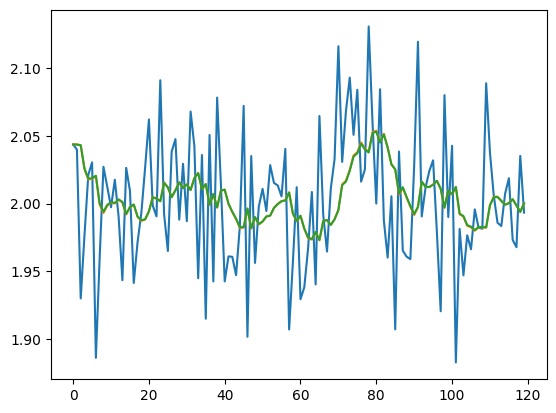

In [ ]:
plt.plot(level)
plt.plot(SES(level, alpha = 0.0563487931439663))
plt.plot(result.fittedvalues)
plt.show();

In [ ]:
result.fittedvalues

array([2.02086709, 2.02086709, 2.02128407, 2.01752973, 2.01863459,
       2.01762791, 2.01828753, 2.0195012 , 2.01680001, 2.01330243,
       2.01627449, 2.01867916, 2.01981517, 2.02114051, 2.02131946,
       2.02439306, 2.02538285, 2.02795874, 2.02598726, 2.02424646,
       2.028157  , 2.02776926, 2.02743025, 2.03090326, 2.03307606,
       2.03253162, 2.0309228 , 2.03123796, 2.0302232 , 2.02614553,
       2.0272264 , 2.0269478 , 2.02892121, 2.02518303, 2.02444889,
       2.02092077, 2.02021681, 2.01993409, 2.01733647, 2.01583767,
       2.01612104, 2.01678455, 2.01636572, 2.01516823, 2.01448793,
       2.01547426, 2.01459091, 2.01402544, 2.01151712, 2.01466792,
       2.01532739, 2.01496072, 2.01257025, 2.00986369, 2.00944359,
       2.01195512, 2.01069288, 2.00928306, 2.00747211, 2.00448034,
       2.00334499, 2.00216321, 2.00185262, 2.00071708, 2.00262521,
       2.00478984, 2.00742967, 2.00839198, 2.00743009, 2.00759617,
       2.00965648, 2.00779789, 2.00646273, 2.00623617, 2.00517

# Simulation of AR(1) and MA(1)

In [185]:
class MA_1():
    def __init__(self, mu, theta, T = 100, err_mu = 0, err_var = 1):
        self.mu = mu
        self.theta = theta
        self.T = T
        self.err_mu = err_mu
        self.err_var = err_var
        self.series, self.mean, self.var = self.call()

    def call(self):
        ma_1 = np.zeros(self.T)
        eps = np.sqrt(self.err_var) * np.random.randn(self.T + 1) + self.err_mu
        for i in range(self.T):
            ma_1[i] = self.mu + self.theta * eps[i - 1] + eps[i]
        return ma_1, ma_1.mean(), ma_1.var()

    def autocorr(self, order = 1):
        auto_corr = 0
        for i in range(self.T - order):
            auto_corr += (self.series[i] - self.mean) * (self.series[i + order] - self.mean)

        auto_corr /= ((self.T - order) * self.var)

        return auto_corr

    def plot_autocorr(self):
        auto_corrs = [1.0]
        for i in range(1, self.T//2):
            auto_corrs.append(self.autocorr(order = i))

        plt.bar(np.arange(self.T//2), auto_corrs)

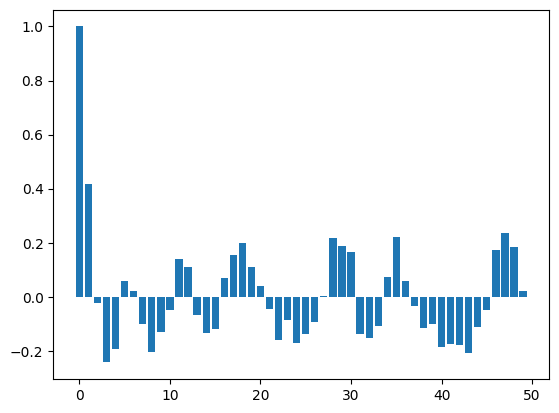

In [188]:
MA_1(0, 0.5).plot_autocorr()

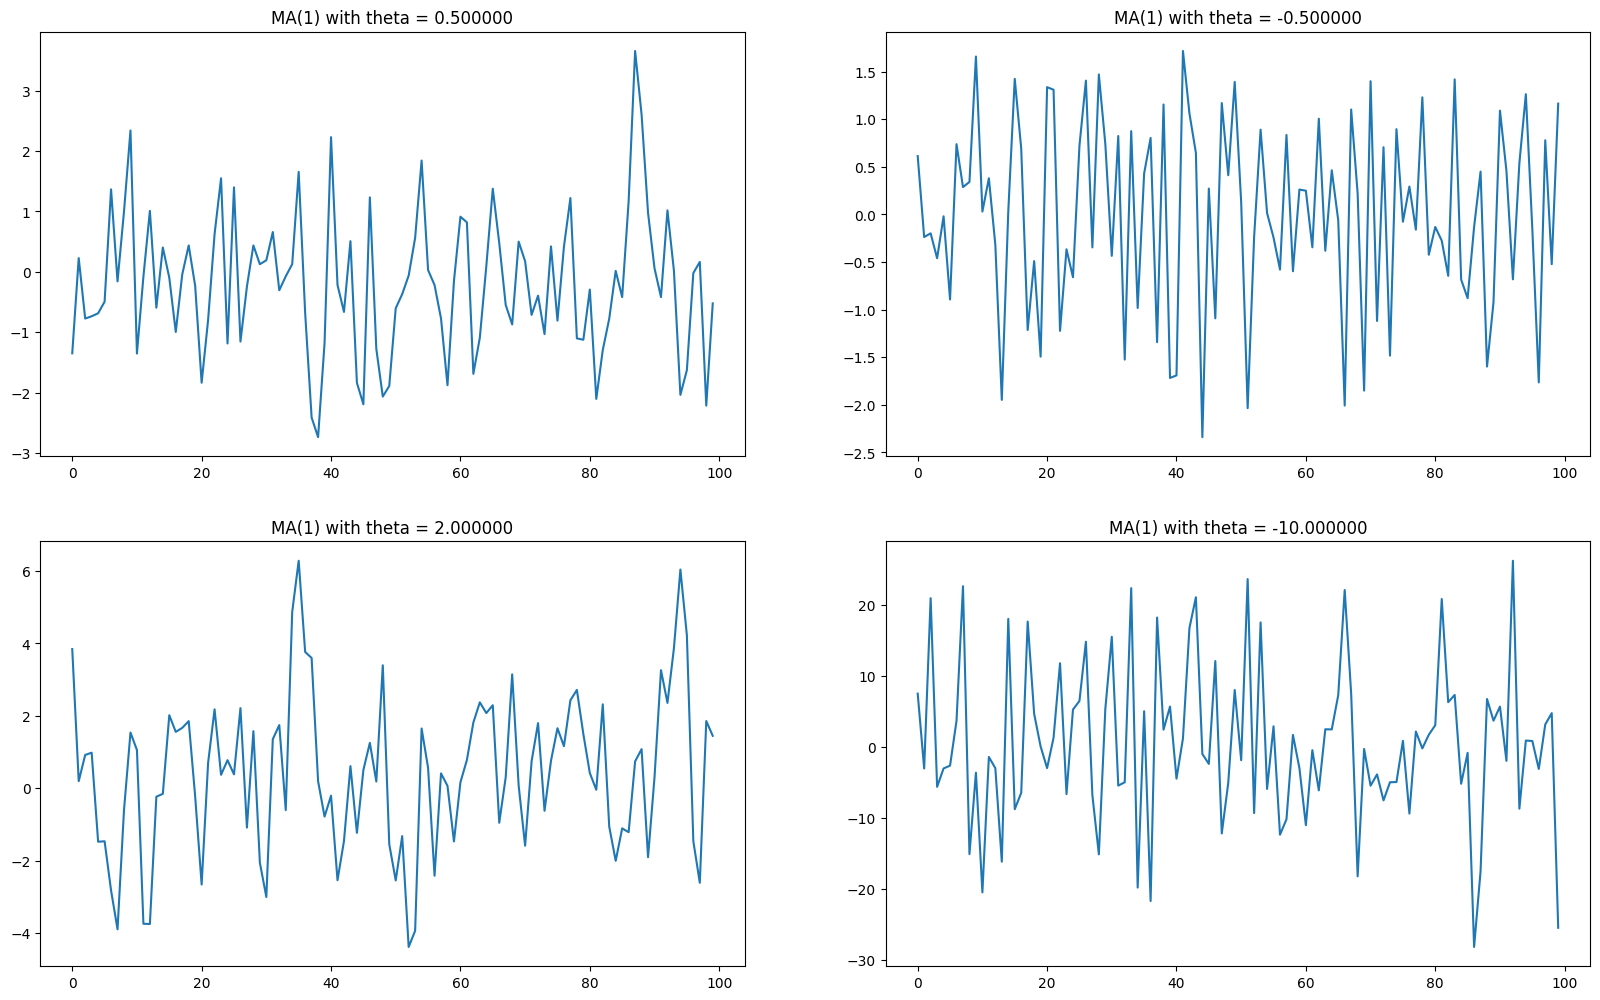

In [105]:
plt.figure(figsize = (20,32))
thetas = [0.5, -0.5, 2.0, -10]
for i, theta in enumerate(thetas):
  plt.subplot(5, 2, i+1)
  plt.title("MA(1) with theta = %f" %theta)
  plt.plot(MA_1(0, theta).series)

In [175]:
class Realization_MA1():
    def __init__(self, mus, thetas, paths = 30, T = 100, err_mu = 0, err_var = 1):
        self.mus = mus
        self.thetas = thetas
        self.paths = paths
        self.T = T
        self.err_mu = err_mu
        self.err_var = err_var
        self.pd_mas_list = self.call()


    def call(self):
        pd_mas_list = []
        for mu, theta in zip(self.mus, self.thetas):
            pd_mas = pd.DataFrame(MA_1(mu, theta).series)
            for i in range(1, self.paths):
                pd_mas[i] = MA_1(mu, theta).series

            pd_mas = pd_mas.transpose()
            pd_mas_list.append(pd_mas)
        return pd_mas_list

    def ensemble_auto_corr(self):
        pass

    def plot_ensemble_mean(self, figsize = (14, 7)):
        print(f'MA(1) Process {self.T} Realizations with {self.T} Time Steps')
        plt.figure(figsize = figsize)

        for i, theta in enumerate(self.thetas):
            plt.subplot(2, len(self.thetas)//2, i+1)
            plt.title(f"Ensemble Means of Each Time Step with theta: {theta:.2f}\nTheoretical Mean: {self.mus[i]:.2f}, Avg of Ensemble Means: {pd_mas_list[i].mean().mean():.2f}")
            plt.plot(self.pd_mas_list[i].mean())
            plt.tight_layout()

    def plot_ensemble_var(self, figsize = (14, 7)):
        print(f'MA(1) Process {self.T} Realizations with {self.T} Time Steps')
        plt.figure(figsize = figsize)

        for i, theta in enumerate(self.thetas):
            plt.subplot(2, len(self.thetas)//2, i+1)
            plt.title(f"Ensemble Variance of Each Time Step with theta: {theta:.2f}\nTheoretical Var: {(1 + theta**2)*self.err_var:.2f}, Avg of Ensemble Var: {pd_mas_list[i].var().mean():.2f}")
            plt.plot(self.pd_mas_list[i].mean())
            plt.tight_layout()


In [176]:
realization = Realization_MA1([0, 0, 0, 0], [0.5, -0.5, 2.0, -10.0])

MA(1) Process 100 Realizations with 100 Time Steps


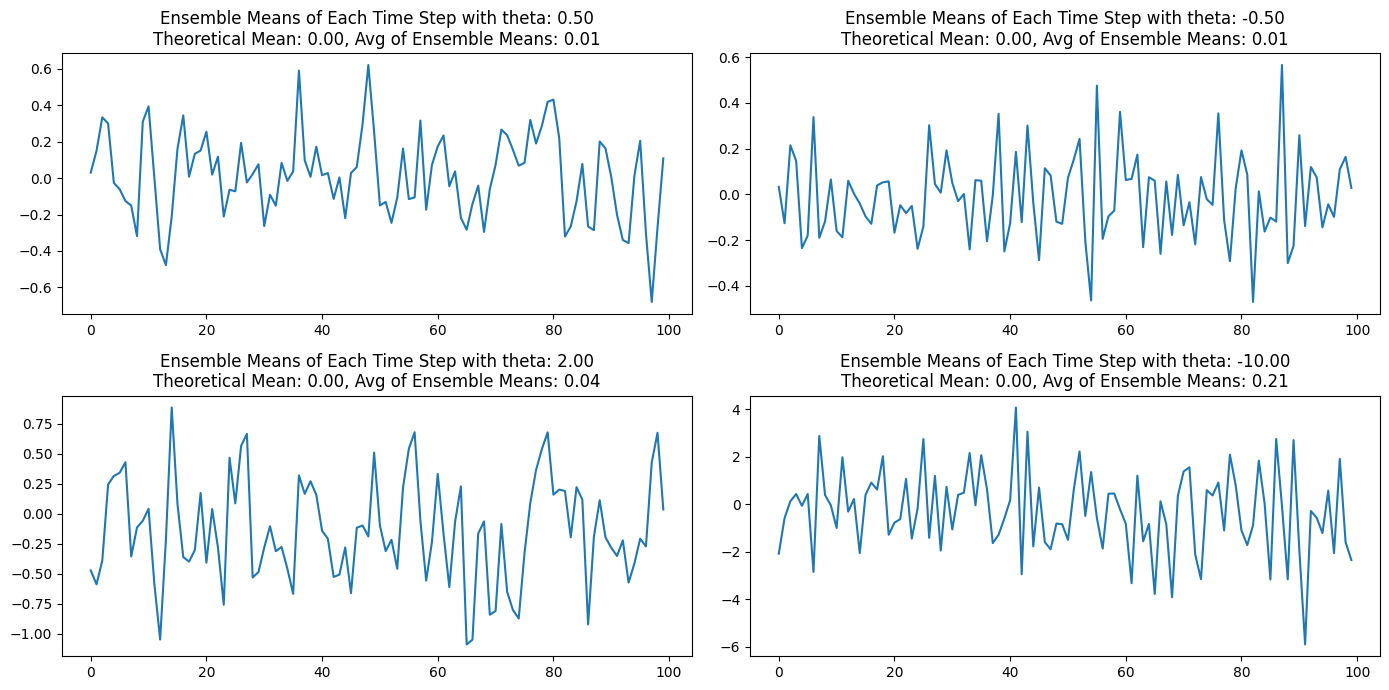

In [177]:
realization.plot_ensemble_mean()

MA(1) Process 100 Realizations with 100 Time Steps


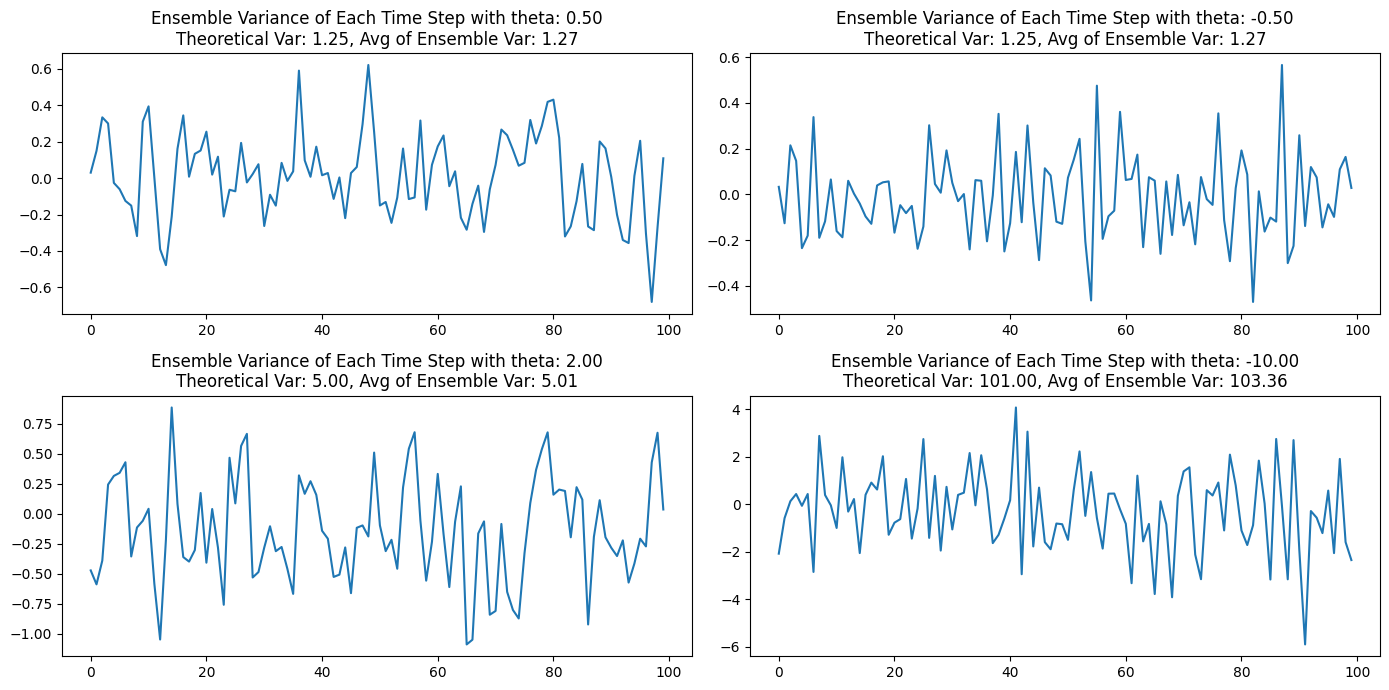

In [178]:
realization.plot_ensemble_var()

In [72]:
pd_mas.cov()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,96.141366,-19.551760,3.049144,20.656348,8.319679,-5.568716,-19.111681,12.653395,10.889174,-13.207972,...,4.463063,17.519040,14.010876,29.497524,11.957832,-28.478597,-5.540904,-11.201546,1.827616,-6.518377
1,-19.551760,58.252576,5.645517,-11.208256,3.030316,10.407562,-3.083261,-0.793030,-12.347707,-0.695672,...,-2.820094,-12.157386,-11.670020,-28.722348,-1.443167,-0.940391,-8.351879,0.000972,4.241529,4.836191
2,3.049144,5.645517,117.942638,26.937202,12.329976,8.230656,-8.830079,-34.397734,-9.802684,-24.234345,...,40.583937,-6.124549,0.999880,26.650989,15.070079,3.620303,-3.111085,1.188056,8.448763,18.807372
3,20.656348,-11.208256,26.937202,116.788058,18.160923,-6.363756,5.156406,-16.375857,21.950464,-33.907935,...,20.709513,-4.787760,10.514331,26.645057,15.290889,-15.729716,-19.117083,-5.626249,16.765361,1.624399
4,8.319679,3.030316,12.329976,18.160923,93.282204,36.218432,24.009121,1.255053,-5.426885,4.849249,...,4.807552,-20.802713,-6.735661,-12.341165,1.417614,0.657272,-18.317590,-12.193533,8.270784,-0.092085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-28.478597,-0.940391,3.620303,-15.729716,0.657272,-11.423350,5.978966,31.401131,-5.958815,-8.135289,...,8.599142,7.799699,0.905607,-6.415650,14.963796,98.667091,18.387512,16.968218,20.145931,20.672933
96,-5.540904,-8.351879,-3.111085,-19.117083,-18.317590,-1.190305,-4.211847,-3.941798,20.800635,-11.872409,...,-7.775827,15.590374,21.668048,7.498428,-4.367116,18.387512,116.976146,-0.588406,-15.178271,6.828294
97,-11.201546,0.000972,1.188056,-5.626249,-12.193533,-16.211020,-12.218678,14.226197,-9.639833,-16.936349,...,-4.786562,23.070085,-5.289996,-25.920747,-24.036842,16.968218,-0.588406,85.872112,32.692683,4.953003
98,1.827616,4.241529,8.448763,16.765361,8.270784,-19.320932,-28.733874,-6.229269,1.246278,0.348286,...,0.647585,10.498901,-11.751572,-17.707832,-2.691052,20.145931,-15.178271,32.692683,106.669099,0.865790


In [96]:
mean = pd_mas.iloc[0,:].mean()
mean

-2.3790158756023563

In [97]:
var = pd_mas.iloc[0,:].var()
var

109.1940556203189

In [98]:
auto_cor = 0
for i in range(99):
    auto_cor += (pd_mas.iloc[0,i] - mean) * (pd_mas.iloc[0,i + 1] - mean)

auto_cor /= (99 * var)

auto_cor

0.11392153923955275

In [87]:
pd_mas.cov()/pd_mas.var()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,0.416333,0.003861,0.070465,-0.026070,-0.368589,0.172467,0.058575,0.081695,0.253963,...,0.046649,-0.112839,-0.155324,0.135634,-0.083252,-0.251824,-0.274633,0.042747,-0.076658,-0.107569
1,0.368445,1.000000,0.098650,0.022657,-0.048565,0.088274,-0.012556,0.174741,0.069440,-0.089084,...,-0.190568,-0.188365,-0.065760,-0.080163,0.132676,0.000565,0.036128,0.205472,-0.076028,0.014260
2,0.003768,0.108781,1.000000,0.149529,0.255334,-0.206111,0.061544,-0.041802,0.196722,-0.114703,...,-0.074510,0.171370,-0.013436,-0.159405,0.047969,-0.252194,0.165711,0.120147,0.055007,0.277793
3,0.085745,0.031154,0.186453,1.000000,0.339718,0.140128,0.503780,0.109491,0.324040,0.059092,...,-0.024436,-0.229728,0.026460,0.014619,0.158392,-0.061002,-0.061652,-0.024830,-0.065043,0.287290
4,-0.019044,-0.040087,0.191133,0.203939,1.000000,0.102132,0.113423,0.044319,0.098937,0.141985,...,-0.064816,-0.020042,0.256806,0.254734,0.127708,-0.067410,0.069101,0.029737,0.073201,0.164185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.211275,0.000535,-0.216819,-0.042060,-0.077421,0.175439,0.028054,0.225593,-0.140761,-0.224189,...,-0.018158,-0.001782,-0.111215,-0.134148,0.221391,1.000000,0.038328,0.119406,-0.150546,-0.094058
96,-0.240720,0.035783,0.148841,-0.044409,0.082913,-0.061047,-0.177581,-0.074584,-0.009416,-0.215751,...,-0.148471,0.126745,0.217604,-0.174232,-0.039737,0.040043,1.000000,0.033078,-0.070487,-0.055743
97,0.034061,0.184997,0.098100,-0.016259,0.032436,-0.011186,0.065267,0.070401,0.053707,-0.151446,...,0.305076,-0.310798,-0.110694,0.105609,0.021235,0.113401,0.030069,1.000000,0.171793,0.059497
98,-0.057419,-0.064350,0.042222,-0.040038,0.075060,0.093472,0.083449,-0.272936,0.306056,0.160054,...,0.221070,-0.181045,0.071588,-0.020763,-0.008053,-0.134407,-0.060235,0.161497,1.000000,-0.087972


In [90]:
auto_cor.mean()

0.12114316716901881

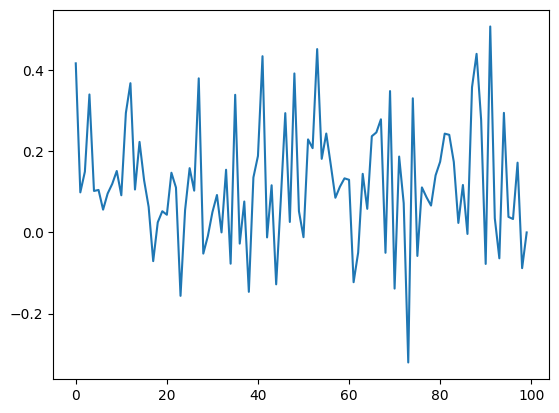

In [92]:
plt.plot(np.arange(100),auto_cor);